<a href="https://colab.research.google.com/github/n3d1m/SYDE-677-Final-Project/blob/main/ImageNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import zipfile
import os
import cv2
import numpy as np
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

In [2]:
!rm -r sample_data/
!rm -r china_set/
!rm -r montgomery_set/

!mkdir china_set
!mkdir montgomery_set

rm: cannot remove 'china_set/': No such file or directory
rm: cannot remove 'montgomery_set/': No such file or directory


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def unzip_images(zip_location, extraction_location):
  with zipfile.ZipFile(zip_location, 'r') as zip_ref:
    zip_ref.extractall(extraction_location)

In [5]:
china_set_path = '/content/drive/MyDrive/SYDE 677 Final Project/Images/ChinaSet_AllFiles.zip'
china_set_extraction_location = '/content/china_set'

montgomery_set_path = '/content/drive/MyDrive/SYDE 677 Final Project/Images/Montgomery.zip'
montgomery_set_extraction_location = '/content/montgomery_set'

unzip_images(china_set_path,china_set_extraction_location)
unzip_images(montgomery_set_path, montgomery_set_extraction_location)


In [6]:
def remove_non_images(image_directory):

  os.remove(image_directory + 'Thumbs.db')


In [7]:
def showImagesHorizontally(list_of_files, images_shown, image_directory, title):
    fig = figure(figsize=(15,15))
    fig.suptitle(title,y=0.6)
    for i in range(images_shown):
        a=fig.add_subplot(1,images_shown,i+1)
        image = imread(image_directory + list_of_files[i])
        imshow(image,cmap='Greys_r')
        axis('off')

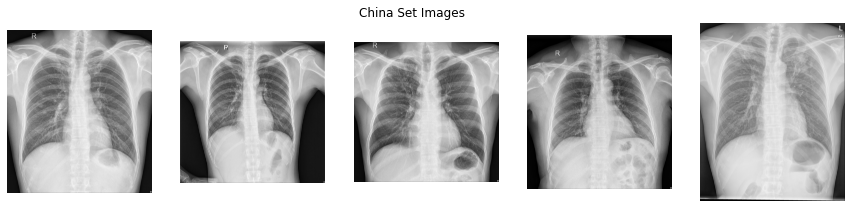

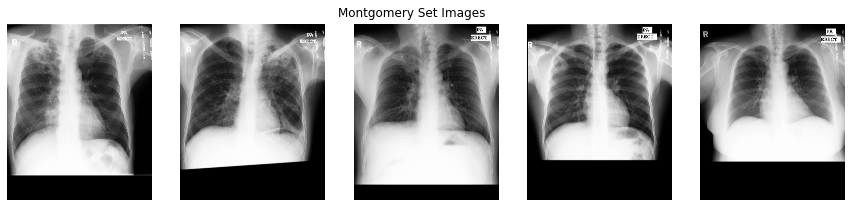

In [8]:
china_set_image_directory = china_set_extraction_location + '/ChinaSet_AllFiles/CXR_png/'
china_set_image_list = os.listdir(china_set_image_directory)

montgomery_set_image_directory = montgomery_set_extraction_location + '/MontgomerySet/CXR_png/'
montgomery_set_image_list = os.listdir(montgomery_set_image_directory)

remove_non_images(china_set_image_directory)
remove_non_images(montgomery_set_image_directory)

showImagesHorizontally(china_set_image_list,5,china_set_image_directory, 'China Set Images')
showImagesHorizontally(montgomery_set_image_list,5,montgomery_set_image_directory, 'Montgomery Set Images')


In [12]:
def crop_background(list_of_files, image_directory):

  for i in range(len(list_of_files)): # there is a .db file at the end of each image directory

    print(image_directory + list_of_files[i])
    if(list_of_files[i] != 'Thumbs.db'):
      img = cv2.imread(image_directory + list_of_files[i])
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

      # threshold 
      thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
      hh, ww = thresh.shape

      # make bottom 2 rows black where they are white the full width of the image
      thresh[hh-3:hh, 0:ww] = 0

      # get bounds of white pixels
      white = np.where(thresh==255)
      xmin, ymin, xmax, ymax = np.min(white[1]), np.min(white[0]), np.max(white[1]), np.max(white[0])

      # crop the image at the bounds adding back the two blackened rows at the bottom
      crop = img[ymin:ymax+3, xmin:xmax]

      # save resulting masked image
      #cv2.imwrite('xray_chest_thresh.jpg', thresh)
      cv2.imwrite(image_directory + list_of_files[i], crop)

In [ ]:
crop_background(china_set_image_list, china_set_image_directory)

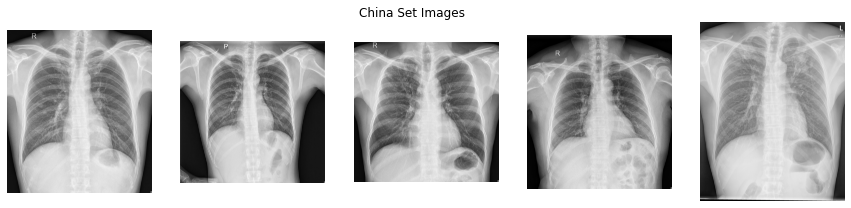

In [14]:
showImagesHorizontally(china_set_image_list,5,china_set_image_directory, 'China Set Images')

In [ ]:
crop_background(montgomery_set_image_list, montgomery_set_image_directory)

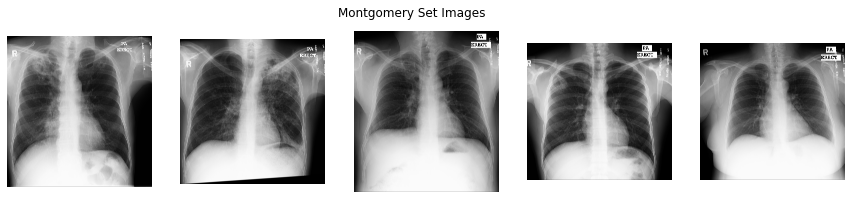

In [16]:
showImagesHorizontally(montgomery_set_image_list,5,montgomery_set_image_directory, 'Montgomery Set Images')